# Stack 3 Exam Part 2
The goal of the project is to demonstrate basic Deep Learning capabilities.

## Import Libraries

In [32]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning and Light Data Exploration

### Data Cleaning

In [33]:
# Load the dataframe
student = pd.read_csv('/content/drive/MyDrive/Stack 3 Exam/Option_B_modeling.csv')
student.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_submitted_1,assess_submitted_2,assess_submitted_3,assess_submitted_4,assess_submitted_5,assess_submitted_6,assess_score_6,assess_submitted_7,assess_score_7,assess_submitted_8,assess_score_8,assess_submitted_9,assess_score_9,assess_submitted_10,assess_score_10,assess_submitted_11,assess_score_11,assess_submitted_12,assess_score_12,assess_submitted_13,assess_score_13,assess_submitted_14,assess_score_14,sum_activities_-25,sum_click_-25,activities_x_clicks_-25,sum_activities_-24,...,sum_activities_260,sum_click_260,activities_x_clicks_260,sum_activities_261,sum_click_261,activities_x_clicks_261,sum_activities_262,sum_click_262,activities_x_clicks_262,sum_activities_263,sum_click_263,activities_x_clicks_263,sum_activities_264,sum_click_264,activities_x_clicks_264,sum_activities_265,sum_click_265,activities_x_clicks_265,sum_activities_266,sum_click_266,activities_x_clicks_266,sum_activities_267,sum_click_267,activities_x_clicks_267,sum_activities_268,sum_click_268,activities_x_clicks_268,module_0,module_AAA,module_BBB,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,80.0,85.0,82.0,-1.0,-1.0,-2.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,70.0,64.0,60.0,3.0,-2.0,4.0,-2.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,74.0,88.0,75.0,-2.0,-3.0,-2.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,63.0,35.0,75.0,7.0,21.0,7.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,62.0,75.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Check the information of the dataframe
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


In [35]:
# Check the value counts
for column in student.columns:
  print(student[column].value_counts())

Streaming output truncated to the last 5000 lines.
5.0      298
4.0      278
2.0      247
7.0      177
6.0      174
8.0      128
9.0      110
10.0      71
11.0      62
12.0      51
13.0      30
15.0      29
14.0      21
16.0      16
18.0      15
17.0      14
19.0      11
22.0       9
21.0       9
26.0       7
20.0       7
27.0       6
23.0       5
25.0       5
35.0       3
36.0       3
33.0       2
37.0       2
29.0       2
45.0       2
41.0       1
40.0       1
32.0       1
24.0       1
34.0       1
65.0       1
31.0       1
30.0       1
Name: sum_activities_202, dtype: int64
0.0      9915
1.0       357
3.0       191
2.0       170
5.0       143
         ... 
81.0        1
115.0       1
421.0       1
103.0       1
74.0        1
Name: sum_click_202, Length: 164, dtype: int64
0.0      9915
1.0       357
9.0       103
2.0       101
12.0       85
         ... 
174.0       1
225.0       1
527.0       1
176.0       1
915.0       1
Name: activities_x_clicks_202, Length: 473, dtype: int64
0.0 

### Data Preprocessing

#### Principal Component Analysis

In [36]:
# Define X and y
X = student.drop(columns='imd_band')
y = student['imd_band']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
student_scaled = scaler.fit_transform(student)

In [38]:
# Instantiate, fit and transform data using PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(student_scaled)

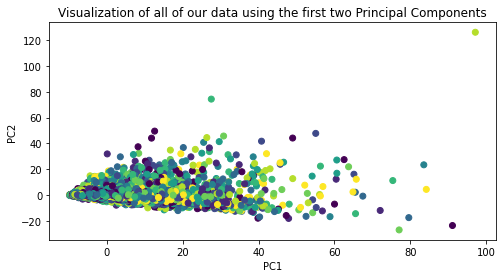

In [39]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

### Modelling

#### Artificial Neural Network

###### First Model

In [40]:
# Scale our data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

930

In [42]:
# Sequential model
model = Sequential()

In [43]:
# First hidden layer
model.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(10,
                activation = 'relu'))

In [44]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

Epoch 1/30
299/299 [==============================] - 1s 3ms/step - loss: -829.6406 - val_loss: -3140.6233
Epoch 2/30
299/299 [==============================] - 1s 2ms/step - loss: -11981.8164 - val_loss: -25497.8340
Epoch 3/30
299/299 [==============================] - 1s 3ms/step - loss: -51600.4492 - val_loss: -83432.1094
Epoch 4/30
299/299 [==============================] - 1s 2ms/step - loss: -133044.1875 - val_loss: -187195.7188
Epoch 5/30
299/299 [==============================] - 1s 2ms/step - loss: -265103.7500 - val_loss: -344851.2188
Epoch 6/30
299/299 [==============================] - 1s 2ms/step - loss: -455042.4062 - val_loss: -562369.4375
Epoch 7/30
299/299 [==============================] - 1s 2ms/step - loss: -708682.7500 - val_loss: -844257.9375
Epoch 8/30
299/299 [==============================] - 1s 2ms/step - loss: -1030497.7500 - val_loss: -1196404.7500
Epoch 9/30
299/299 [==============================] - 1s 2ms/step - loss: -1422887.1250 - val_loss: -1618315.87

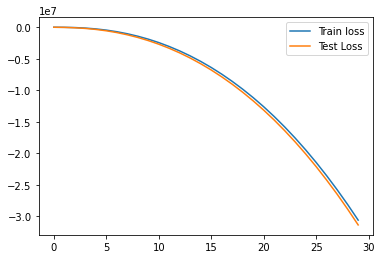

In [46]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

###### Second Model

In [47]:
# First hidden layer
model.add(Dense(30,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(20,
                activation = 'relu'))

# Third hidden layer
model.add(Dense(10,
                activation = 'relu'))

In [48]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/10
299/299 [==============================] - 2s 4ms/step - loss: -16.6849 - val_loss: -96.3754
Epoch 2/10
299/299 [==============================] - 1s 3ms/step - loss: -838.3336 - val_loss: -2325.4690
Epoch 3/10
299/299 [==============================] - 1s 3ms/step - loss: -6445.3081 - val_loss: -12440.5215
Epoch 4/10
299/299 [==============================] - 1s 3ms/step - loss: -23754.0352 - val_loss: -38106.9688
Epoch 5/10
299/299 [==============================] - 1s 3ms/step - loss: -60760.2266 - val_loss: -87402.6406
Epoch 6/10
299/299 [==============================] - 1s 3ms/step - loss: -126182.0312 - val_loss: -169311.3594
Epoch 7/10
299/299 [==============================] - 1s 3ms/step - loss: -228378.6094 - val_loss: -291941.6250
Epoch 8/10
299/299 [==============================] - 1s 3ms/step - loss: -375527.0625 - val_loss: -462879.9375
Epoch 9/10
299/299 [==============================] - 1s 3ms/step - loss: -575126.5625 - val_loss: -689898.1875
Epoch 10/10


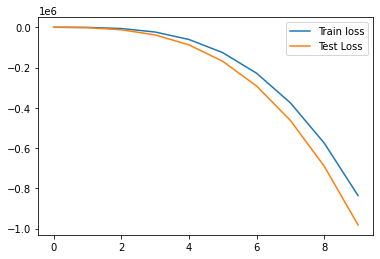

In [49]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Increasing the number of neurons decreased the number of epochs needed to reduce the train and test loss. We will now try adding 1 more hidden layer and increasing the number of neurons again.

###### Third Model

In [50]:
# First hidden layer
model.add(Dense(50,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(40,
                activation = 'relu'))

# Third hidden layer
model.add(Dense(20,
                activation = 'relu'))

# Fourth hidden layer
model.add(Dense(10,
                activation = 'relu'))

Epoch 1/10
299/299 [==============================] - 4s 7ms/step - loss: -1146.0858 - val_loss: -7568.1235
Epoch 2/10
299/299 [==============================] - 1s 3ms/step - loss: -100096.8828 - val_loss: -316269.7500
Epoch 3/10
299/299 [==============================] - 1s 3ms/step - loss: -1108685.3750 - val_loss: -2411945.2500
Epoch 4/10
299/299 [==============================] - 1s 3ms/step - loss: -5404540.5000 - val_loss: -9571555.0000
Epoch 5/10
299/299 [==============================] - 1s 3ms/step - loss: -17190690.0000 - val_loss: -26800304.0000
Epoch 6/10
299/299 [==============================] - 1s 3ms/step - loss: -42187336.0000 - val_loss: -60433324.0000
Epoch 7/10
299/299 [==============================] - 1s 3ms/step - loss: -87503080.0000 - val_loss: -118245568.0000
Epoch 8/10
299/299 [==============================] - 1s 3ms/step - loss: -161644000.0000 - val_loss: -209205808.0000
Epoch 9/10
299/299 [==============================] - 1s 3ms/step - loss: -273649504.

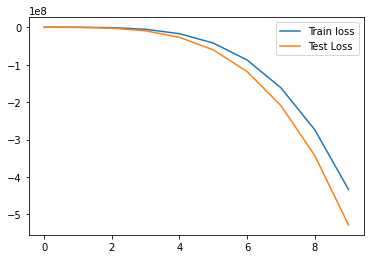

In [51]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Adding another neurons and hidden layer increased the train and test loss. We will now proceed with further iterations to enhance the model

###### Final Model

Epoch 1/20
299/299 [==============================] - 12s 17ms/step - loss: -897.6304 - val_loss: -7204.5864
Epoch 2/20
299/299 [==============================] - 4s 14ms/step - loss: -202715.0938 - val_loss: -756921.6875
Epoch 3/20
299/299 [==============================] - 4s 14ms/step - loss: -3698445.2500 - val_loss: -9279626.0000
Epoch 4/20
299/299 [==============================] - 4s 15ms/step - loss: -25560590.0000 - val_loss: -50433112.0000
Epoch 5/20
299/299 [==============================] - 4s 14ms/step - loss: -104044232.0000 - val_loss: -176437776.0000
Epoch 6/20
299/299 [==============================] - 4s 14ms/step - loss: -306359232.0000 - val_loss: -470378432.0000
Epoch 7/20
299/299 [==============================] - 4s 14ms/step - loss: -735281792.0000 - val_loss: -1053349376.0000
Epoch 8/20
299/299 [==============================] - 4s 14ms/step - loss: -1535380352.0000 - val_loss: -2087992192.0000
Epoch 9/20
299/299 [==============================] - 4s 15ms/step 

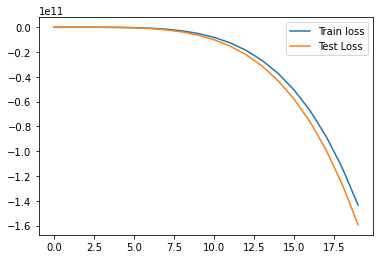

In [72]:
# First hidden layer
model.add(Dense(19,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(15,
                activation = 'relu'))

# Add hidden layer
model.add(Dense(13,
                activation = 'relu'))

# Add hidden layer
model.add(Dense(11,
                activation = 'relu'))

# Add hidden layer
model.add(Dense(10,
                activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();